In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

## Newton's Method Optimization
### Single Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐−𝟏𝟓𝒙+𝟏$,        
- Draw the functions and check out the minimum.
- Draw the 1st derivative of the function and check out the root.
- Draw 2nd derivative of the function and check out the sign at the minimum.
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function should return the solution and the gradient.

##### Notes:
- You will need to pass the expression of the function, first, and second derivatives to the optimizer.
- You can use lambda expression to construct the function, first, and second derivatives.

In [4]:
f = lambda x: x**2 - 15*x +1
Df = lambda x: 2*x -15
DDf = lambda x: 2

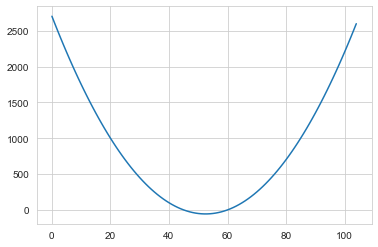

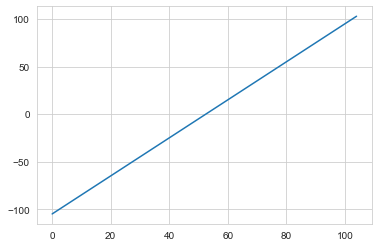

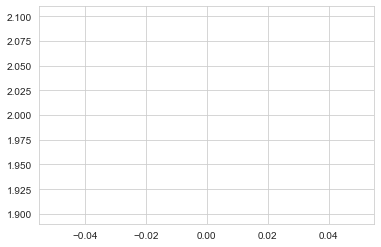

In [5]:
x = np.arange(-45,60,1)
plt.plot(f(x))
plt.show()
plt.plot(Df(x))
plt.show()
plt.plot(DDf(x))
plt.show()

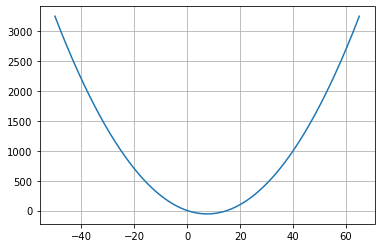

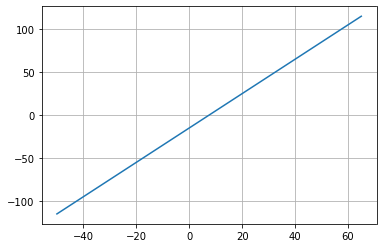

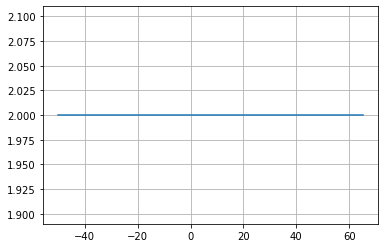

In [22]:
def GD(alpha, x0, EPS=1e-8):
    count = 0
    while True:
        x0 = x0 - alpha*Df(x0)
        count += 1
        if Df(x0) < EPS:
            print(count)
            print(x0)
            print(Df(x0))
            break


In [23]:
GD(0.01,40,0.1)

321
7.549596800192111
0.09919360038422198


In [6]:
# Gradient descent with learning rate = 0.01, x0=40, epsilon = 0.1


GD Results with x0 =40, lr=0.01, epsilon=0.1
Found solution after 321 iterations.
x_min = 7.549596800192111
Gradient = 0.09919360038422198


In [45]:
def Newton(x0, EPS=1e-8):
    count = 0
    while True:
        x0 = x0 - Df(x0)/DDf(x0)
        count += 1
        if Df(x0) < EPS:
            print(count)
            print(x0)
            print(Df(x0))
            break


In [46]:
Newton(40,0.1)

1
7.5
0.0


In [7]:
# Newton's method without learning rate, x0=40, epsilon = 0.1


Newton Results with x0 =40, epsilon=0.1
Found solution after 1 iterations.
x_min = 7.5
Gradient = 0.0


In [47]:
def Newton(alpha, x0, EPS=1e-8):
    count = 0
    while True:
        x0 = x0 - alpha*(Df(x0)/DDf(x0))
        count += 1
        if Df(x0) < EPS:
            print(count)
            print(x0)
            print(Df(x0))
            break


In [48]:
Newton(0.8,40,0.1)

5
7.5104
0.020799999999999486


In [8]:
# Newton's method with learning rate = 0.8, x0=40, epsilon = 0.1


Newton Results  with x0 =40, epsilon=0.1, lr=0.8
Found solution after 5 iterations.
x_min = 7.5104
Gradient = 0.020799999999999486


### Multi Variable
- Implement the <b>Gradient decent and Newton's method</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results with Gradient descent.
##### The function shgould return the solution and the gradient.

In [49]:
from sympy import *
from sympy.plotting import plot3d

$𝒇(𝒙)=𝒙^𝟐+y^2$

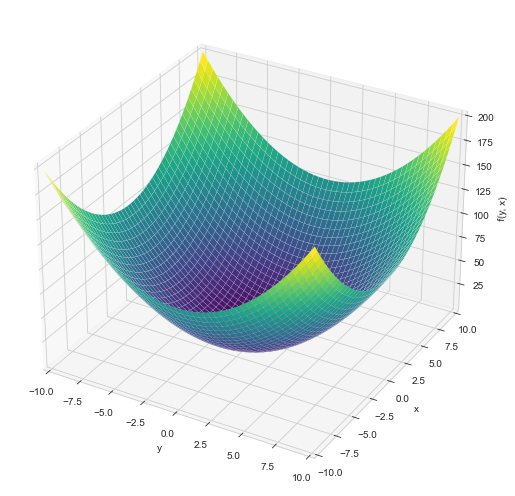

In [50]:
x,y = symbols('x y')
f = x**2 + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐+xy+y^2$  

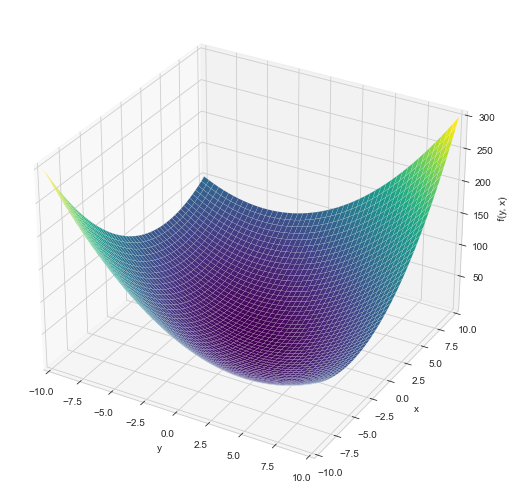

In [51]:
x,y = symbols('x y')
f = x**2 + x * y + y**2
plot3d(f,size=(10,7))
plt.show()

$𝒇(𝒙)=𝒙^𝟐y$ 

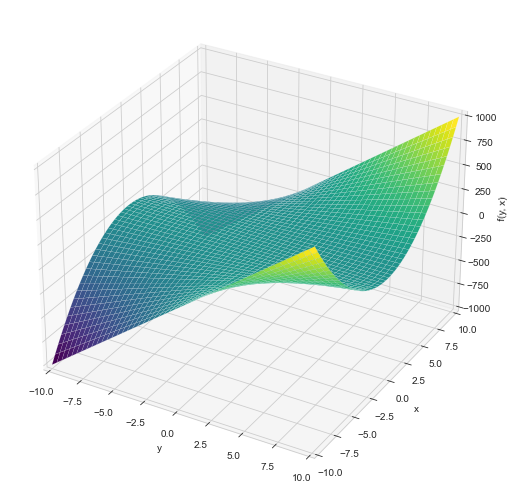

In [52]:
x,y = symbols('x y')
f = x**2 * y
plot3d(f,size=(10,7))
plt.show()

In [8]:
f_1 = lambda x: x**2  + y**2
Df_1 = lambda X: np.array([2*X[0],2*X[1]])
DDf_1 = lambda X: np.array([[2,0],
                         [0,2]])

In [9]:
f_2 = lambda x: x**2 + x*y + y**2
Df_2 = lambda X: np.array([2*X[0]+X[1],2*X[1]+X[0]])
DDf_2 = lambda X: np.array([[2,1],
                        [1,2]])

In [103]:
def MGD(Df,alpha, x0, EPS=1e-8):
    count = 0
    while True:
        x0 = x0 - alpha*Df(x0)
        count += 1
        if np.linalg.norm(Df(x0)) < EPS:
            print(count)
            print(x0)
            print(Df(x0))
            break


In [105]:
MGD(Df=Df_1,alpha=0.1, x0=(10,10), EPS=0.001)

46
[0.00034845 0.00034845]
[0.0006969 0.0006969]


In [17]:
# First function
# Multi-variable Gradient descent with learning rate = 0.1,
# x0=(10,10), epsilon = 0.001


Found solution after 46 iterations.
xy_min = [0.00034845 0.00034845]
Gradient = [0.0006969 0.0006969]


In [106]:
MGD(Df=Df_1,alpha=0.5, x0=(10,10), EPS=0.001)

1
[0. 0.]
[0. 0.]


In [18]:
# First function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [108]:
def MNewton(Df, DDf, x0, EPS=1e-8):
    count = 0
    while True:
        x0 = x0 - np.matmul(np.linalg.inv(DDf(x0)),Df(x0)) # 2*2 , 2*1
        count += 1
        if np.linalg.norm(Df(x0)) < EPS:
            print(count)
            print(x0)
            print(Df(x0))
            break


In [111]:
MNewton(Df=Df_1, DDf=DDf_1,x0=(10,10),EPS=0.001)

1
[0. 0.]
[0. 0.]


In [19]:
# First function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [112]:
def MNewton(alpha, Df, DDf, x0, EPS=1e-8):
    count = 0
    while True:
        x0 = x0 - alpha*(np.matmul(np.linalg.inv(DDf(x0)),Df(x0))) # 2*2 , 2*1
        count += 1
        if np.linalg.norm(Df(x0)) < EPS:
            print(count)
            print(x0)
            print(Df(x0))
            break


In [113]:
MNewton(0.5,Df=Df_1, DDf=DDf_1,x0=(10,10),EPS=0.001)

15
[0.00030518 0.00030518]
[0.00061035 0.00061035]


In [20]:
# First function
# Multi-variable Newton's method with learning rate = 0.5, 
# x0=(10,10), epsilon = 0.001

Found solution after 15 iterations.
xy_min = [0.00030518 0.00030518]
Gradient = [0.00061035 0.00061035]


In [114]:
MNewton(0.5,Df=Df_2, DDf=DDf_2,x0=(10,10),EPS=0.001)

16
[0.00015259 0.00015259]
[0.00045776 0.00045776]


In [21]:
# Second function
# Multi-variable Gradient descent with learning rate = 0.5,
# x0=(10,10), epsilon = 0.001

Found solution after 16 iterations.
xy_min = [0.00015259 0.00015259]
Gradient = [0.00045776 0.00045776]


In [117]:
MGD(alpha=0.5,Df=Df_2,x0=(10,10),EPS=0.001)

16
[0.00015259 0.00015259]
[0.00045776 0.00045776]


In [22]:
# Second function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 1 iterations.
xy_min = [0. 0.]
Gradient = [0. 0.]


In [118]:
MNewton(1,Df=Df_2, DDf=DDf_2,x0=(10,10),EPS=0.001)

1
[0. 0.]
[0. 0.]


In [23]:
# Second function
# Multi-variable Newton's method with learning rate = 0.9, 
# x0=(10,10), epsilon = 0.001


Found solution after 5 iterations.
xy_min = [0.0001 0.0001]
Gradient = [0.0003 0.0003]


In [119]:
MNewton(0.9,Df=Df_2, DDf=DDf_2,x0=(10,10),EPS=0.001)

5
[1.e-04 1.e-04]
[0.0003 0.0003]


In [10]:
f_5 = lambda x: x**2 * y
Df_5 = lambda X: np.array([2*X[0]*X[1],
                           X[0]**2])
DDf_5 = lambda X: np.array([[2*X[1],2*X[0]],
                         [2*X[0],0]])

In [123]:
MGD(alpha=0.01,Df=Df_5,x0=(10,10),EPS=0.001)

79
[6.80598421e-05 6.85061189e+00]
[9.32503127e-04 4.63214210e-09]


In [25]:
# Third function
# Multi-variable Gradient descent with learning rate = 0.01,
# x0=(10,10), epsilon = 0.001


Found solution after 79 iterations.
xy_min = [6.80598421e-05 6.85061189e+00]
Gradient = [9.32503127e-04 4.63214210e-09]


In [124]:
MNewton(1,Df=Df_5, DDf=DDf_5,x0=(10,10),EPS=0.001)

9
[0.01953125 0.01953125]
[0.00076294 0.00038147]


In [26]:
# Third function
# Multi-variable Newton's method without learning rate, 
# x0=(10,10), epsilon = 0.001


Found solution after 9 iterations.
xy_min = [0.01953125 0.01953125]
Gradient = [0.00076294 0.00038147]


## BFGS
- Implement the <b>BFGS</b> as a function and find the minimum of the following function:
    - $𝒇(𝒙)=𝒙^𝟐+y^2$
    - $𝒇(𝒙)=𝒙^𝟐+xy+y^2$  
    - $𝒇(𝒙)=𝒙^𝟐y$ 
- The stop condition is grad < epsilon.
- Try different epsilons and initial conditions.
- Compare the results from Gradient descent and Newton's method.

In [6]:
def BFGS(x1, x0, Df, DDf, EPS=1e-8):
    B = np.eye(2)
    delta_x = x1 - x0
    y = DDf(x1) - DDf(x0)
    B_inv = (np.eye(2) - (delta_x*y.T / y.T*delta_x)) * np.linalg.inv(B) * (np.eye(2) - (y*delta_x.T / y.T*delta_x)) + \
        ((delta_x*delta_x.T) /(y.t*delta_x))
    x1 = x0 - B_inv @ Df(x0)


In [25]:
X_k1 = (10, 10)
X_0 = (9, 9)

epsilon = 0.001

def bfgd(f, Df, DDf, X_k1, X_0, epsilon):
    X_k = np.array(X_0)
    X_k1 = np.array(X_k1)
    k = 0
    
    while np.linalg.norm(X_k - X_k1) > epsilon:
        p_k = -np.linalg.inv(DDf(X_k)).dot(Df(X_k))
        
        alpha_k = 1
        while f(X_k[0] + alpha_k * p_k[0], X_k[1] + alpha_k * p_k[1]) > f(X_k[0], X_k[1]) + 1e-4 * alpha_k * Df(X_k).dot(p_k):
            alpha_k *= 0.5
        
        X_k1 = X_k + alpha_k * p_k
        
        X_k = X_k1
        k += 1
    
    return X_k

# Test the function
X_min = bfgd(f_1, Df_1, DDf_1, X_k1, X_0, epsilon)
print("Minimum found:", X_min)
print("Function value at minimum:", f_1(X_min[0], X_min[1]))


Minimum found: [0. 0.]
Function value at minimum: 0.0


In [28]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.]
 [0.]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[0.]
 [0.]]
0.0
*****
Found solution after 1 iterations.
xy_min = [[0.]
 [0.]]
Gradient = [[0.]
 [0.]]


In [28]:
X_k1 = (10, 10)
X_0 = (9, 9)

epsilon = 0.001

def bfgd(f, Df, DDf, X_k1, X_0, epsilon):
    X_k = np.array(X_0)
    X_k1 = np.array(X_k1)
    k = 0
    
    while np.linalg.norm(X_k - X_k1) > epsilon:
        p_k = -np.linalg.inv(DDf(X_k)).dot(Df(X_k))
        
        alpha_k = 0.
        while f(X_k[0] + alpha_k * p_k[0], X_k[1] + alpha_k * p_k[1]) > f(X_k[0], X_k[1]) + 1e-4 * alpha_k * Df(X_k).dot(p_k):
            alpha_k *= 0.5
        
        X_k1 = X_k + alpha_k * p_k
        
        X_k = X_k1
        k += 1
    
    return X_k

# Test the function
X_min = bfgd(f_2, Df_2, DDf_2, X_k1, X_0, epsilon)
print("Minimum found:", X_min)
print("Function value at minimum:", f_2(X_min[0], X_min[1]))


Minimum found: [9. 9.]
Function value at minimum: 162.0


In [29]:
## First function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001, 
## learning rate =0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[20.]
 [20.]]
Dfxn
 [[18.]
 [18.]]
25.45584412271571
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[18.]
 [18.]]
Dfxn
 [[1.8]
 [1.8]]
2.545584412271567
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[1.8]
 [1.8]]
Dfxn
 [[0.18]
 [0.18]]
0.2545584412271567
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.18]
 [0.18]]
Dfxn
 [[0.018]
 [0.018]]
0.025455844122715655
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.018]
 [0.018]]
Dfxn
 [[0.0018]
 [0.0018]]
0.0025455844122715655
*****
B_inv
 [[ 0.75 -0.25]
 [-0.25  0.75]]
****************
xn_1:
 [[0.0009]
 [0.0009]]
xn
: [[9.e-05]
 [9.e-05]]
Dfxn_1
 [[0.0018]
 [0.0018]]
Dfxn
 [[0.00018]
 [0.00018]]
0.00025455844122715653


In [30]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[1.77635684e-15]
 [1.77635684e-15]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[5.32907052e-15]
 [5.32907052e-15]]
7.53644380168212e-15
*****
Found solution after 1 iterations.
xy_min = [[1.77635684e-15]
 [1.77635684e-15]]
Gradient = [[5.32907052e-15]
 [5.32907052e-15]]


In [31]:
## Second function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001,
## learning rate  = 0.9


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[30.]
 [30.]]
Dfxn
 [[27.]
 [27.]]
38.18376618407357
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[0.9]
 [0.9]]
Dfxn_1
 [[27.]
 [27.]]
Dfxn
 [[2.7]
 [2.7]]
3.8183766184073655
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.9]
 [0.9]]
xn
: [[0.09]
 [0.09]]
Dfxn_1
 [[2.7]
 [2.7]]
Dfxn
 [[0.27]
 [0.27]]
0.38183766184073553
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.09]
 [0.09]]
xn
: [[0.009]
 [0.009]]
Dfxn_1
 [[0.27]
 [0.27]]
Dfxn
 [[0.027]
 [0.027]]
0.038183766184073605
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.009]
 [0.009]]
xn
: [[0.0009]
 [0.0009]]
Dfxn_1
 [[0.027]
 [0.027]]
Dfxn
 [[0.0027]
 [0.0027]]
0.0038183766184073705
*****
B_inv
 [[ 0.66666667 -0.33333333]
 [-0.33333333  0.66666667]]
****************
xn_1:
 [[0.00

In [32]:
## Third function
## BFGD with xk-1 = (10,10) and x0 = (9,9), epsilon = 0.001


xn_1:
 [[10.]
 [10.]]
xn
: [[9.]
 [9.]]
Dfxn_1
 [[200.]
 [100.]]
Dfxn
 [[162.]
 [ 81.]]
181.12150617748296
*****
B_inv
 [[ 0.23976608 -0.42690058]
 [-0.42690058  0.90643275]]
****************
xn_1:
 [[9.]
 [9.]]
xn
: [[4.73684211]
 [4.73684211]]
Dfxn_1
 [[162.]
 [ 81.]]
Dfxn
 [[44.87534626]
 [22.43767313]]
50.172162376034116
*****
B_inv
 [[ 0.24648787 -0.4201788 ]
 [-0.4201788   0.91315453]]
****************
xn_1:
 [[4.73684211]
 [4.73684211]]
xn
: [[3.10344828]
 [3.10344828]]
Dfxn_1
 [[44.87534626]
 [22.43767313]]
Dfxn
 [[19.2627824]
 [ 9.6313912]]
21.536445443220412
*****
B_inv
 [[ 0.26473765 -0.40192901]
 [-0.40192901  0.93140432]]
****************
xn_1:
 [[3.10344828]
 [3.10344828]]
xn
: [[1.875]
 [1.875]]
Dfxn_1
 [[19.2627824]
 [ 9.6313912]]
Dfxn
 [[7.03125 ]
 [3.515625]]
7.861176483398041
*****
B_inv
 [[ 0.28917749 -0.37748918]
 [-0.37748918  0.95584416]]
****************
xn_1:
 [[1.875]
 [1.875]]
xn
: [[1.16883117]
 [1.16883117]]
Dfxn_1
 [[7.03125 ]
 [3.515625]]
Dfxn
 [[2.732332